##**Connect Colab with Google Drive**

In [50]:
from google.colab import drive
drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


##**Imported required libraries**

In [51]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

##Reading consumer complaints dataset

In [52]:
df= pd.read_csv("/content/consumer_complaints.csv")
df.head()

/tmp/ipython-input-1886552207.py:1: DtypeWarning: Columns (5,11) have mixed types. Specify dtype option on import or set low_memory=False.
  df= pd.read_csv("/content/consumer_complaints.csv")


,date_received,product,sub_product,issue,sub_issue,consumer_complaint_narrative,company_public_response,company,state,zipcode,tags,consumer_consent_provided,submitted_via,date_sent_to_company,company_response_to_consumer,timely_response,consumer_disputed?,complaint_id
0,08/30/2013,Mortgage,Other mortgage,"Loan modification,collection,foreclosure",NaN,NaN,NaN,U.S. Bancorp,CA,95993,NaN,NaN,Referral,09/03/2013,Closed with explanation,Yes,Yes,511074
1,08/30/2013,Mortgage,Other mortgage,"Loan servicing, payments, escrow account",NaN,NaN,NaN,Wells Fargo & Company,CA,91104,NaN,NaN,Referral,09/03/2013,Closed with explanation,Yes,Yes,511080
2,08/30/2013,Credit reporting,NaN,Incorrect information on credit report,Account status,NaN,NaN,Wells Fargo & Company,NY,11764,NaN,NaN,Postal mail,09/18/2013,Closed with explanation,Yes,No,510473
3,08/30/2013,Student loan,Non-federal student loan,Repaying your loan,Repaying your loan,NaN,NaN,"Navient Solutions, Inc.",MD,21402,NaN,NaN,Email,08/30/2013,Closed with explanation,Yes,Yes,510326
4,08/30/2013,Debt collection,Credit card,False statements or representation,Attempted to collect wrong amount,NaN,NaN,Resurgent Capital Services L.P.,GA,30106,NaN,NaN,Web,08/30/2013,Closed with explanation,Yes,Yes,511067


In [53]:
cp= df["product"].value_counts()
cp

,count
product,
Mortgage,186475
Debt collection,101052
Credit reporting,91854
Credit card,66468
Bank account or service,62563
Consumer Loan,20990
Student loan,15839
Payday loan,3877
Money transfers,3812


In [54]:
cr= df['company_response_to_consumer'].value_counts()
cr

,count
company_response_to_consumer,
Closed with explanation,404293
Closed with non-monetary relief,70237
Closed with monetary relief,38262
Closed without relief,17909
Closed,13399
Closed with relief,5305
In progress,3763
Untimely response,2789


In [55]:
disputed = df['consumer_disputed?'].value_counts()
tdispute = df['company'].loc[df['consumer_disputed?'] == 'Yes'].value_counts()[:10]
tnodispute = df['company'].loc[df['consumer_disputed?'] == 'No'].value_counts()[:10]

In [56]:
disputed

,count
consumer_disputed?,
No,443823
Yes,112134


In [57]:
tdispute

,count
company,
Bank of America,12480
Wells Fargo & Company,9644
JPMorgan Chase & Co.,7716
Equifax,6647
Citibank,5245
Ocwen,5067
Experian,3891
"TransUnion Intermediate Holdings, Inc.",3824
Nationstar Mortgage,3157


In [58]:
tnodispute

,count
company,
Bank of America,43518
Wells Fargo & Company,32380
Experian,27014
JPMorgan Chase & Co.,26165
Equifax,25181
"TransUnion Intermediate Holdings, Inc.",21710
Citibank,20295
Ocwen,15911
Capital One,12693


#**Creating Word Cloud**

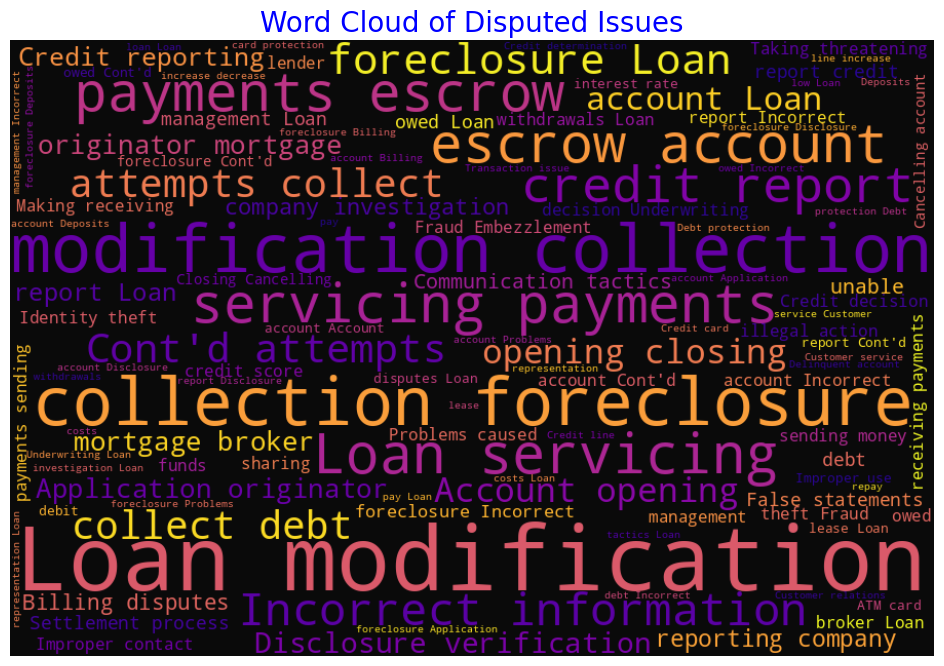

In [59]:
import numpy as np
from PIL import Image

disputes_issue = df['issue'][df['consumer_disputed?'] == 'Yes']

color_theme = "plasma"
background = "#0A0A0A"
mask_image = None



word_cloud = WordCloud(
    width=900,
    height=600,
    background_color=background,
    colormap=color_theme,
    stopwords=STOPWORDS,
    max_words=2000,
    max_font_size=120,
    min_font_size=10,
    mask=mask_image,
    contour_width=2,
    contour_color="red",

    mode = "RGBA"

).generate(" ".join(disputes_issue.astype(str)))

plt.figure(figsize=(14, 8))
plt.imshow(word_cloud, interpolation="bilinear")
plt.title("Word Cloud of Disputed Issues", fontsize=20, color="grey" if background=="red" else "blue")
plt.axis("off")
plt.show()


In [60]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer

In [61]:
df['issue'] = df['issue'].str.strip().str.lower()

## Encode labels

In [62]:
from sklearn import preprocessing

# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()

# Encode labels in column.
df['consumer_disputed']= label_encoder.fit_transform(df['consumer_disputed?'])

df['consumer_disputed'].unique()
# YES = 1
# No = 0

array([1, 0])

In [63]:
df

,date_received,product,sub_product,issue,sub_issue,consumer_complaint_narrative,company_public_response,company,state,zipcode,tags,consumer_consent_provided,submitted_via,date_sent_to_company,company_response_to_consumer,timely_response,consumer_disputed?,complaint_id,consumer_disputed
0,08/30/2013,Mortgage,Other mortgage,"loan modification,collection,foreclosure",NaN,NaN,NaN,U.S. Bancorp,CA,95993,NaN,NaN,Referral,09/03/2013,Closed with explanation,Yes,Yes,511074,1
1,08/30/2013,Mortgage,Other mortgage,"loan servicing, payments, escrow account",NaN,NaN,NaN,Wells Fargo & Company,CA,91104,NaN,NaN,Referral,09/03/2013,Closed with explanation,Yes,Yes,511080,1
2,08/30/2013,Credit reporting,NaN,incorrect information on credit report,Account status,NaN,NaN,Wells Fargo & Company,NY,11764,NaN,NaN,Postal mail,09/18/2013,Closed with explanation,Yes,No,510473,0
3,08/30/2013,Student loan,Non-federal student loan,repaying your loan,Repaying your loan,NaN,NaN,"Navient Solutions, Inc.",MD,21402,NaN,NaN,Email,08/30/2013,Closed with explanation,Yes,Yes,510326,1
4,08/30/2013,Debt collection,Credit card,false statements or representation,Attempted to collect wrong amount,NaN,NaN,Resurgent Capital Services L.P.,GA,30106,NaN,NaN,Web,08/30/2013,Closed with explanation,Yes,Yes,511067,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
555952,07/01/2014,Mortgage,Other mortgage,"loan modification,collection,foreclosure",NaN,NaN,NaN,Bank of America,NaN,NaN,NaN,NaN,Referral,07/07/2014,Closed with explanation,Yes,No,919529,0
555953,07/01/2014,Mortgage,Other mortgage,"loan servicing, payments, escrow account",NaN,NaN,NaN,Residential Credit Solutions,NaN,NaN,"Older American, Servicemember",NaN,Referral,07/23/2014,Closed with explanation,No,No,918447,0
555954,07/10/2012,Mortgage,Conventional fixed mortgage,"loan modification,collection,foreclosure",NaN,NaN,NaN,BB&T Financial,NaN,NaN,NaN,NaN,Phone,11/18/2013,Closed with explanation,Yes,No,114550,0
555955,04/14/2015,Debt collection,I do not know,communication tactics,Frequent or repeated calls,NaN,NaN,Global Recovery Group,NaN,NaN,NaN,NaN,Phone,04/14/2015,Untimely response,No,No,1329963,0


## Dividing dataset into test and train set

In [64]:
x = df['issue']
y = df['consumer_disputed']
x, x_test, y, y_test = train_test_split(x,y, stratify=y, test_size=0.25, random_state=42)

## Vectorize text reviews to numbers

In [65]:
vec = CountVectorizer(stop_words='english')
x = vec.fit_transform(x).toarray()
x_test = vec.transform(x_test).toarray()

##**Navie Bayes**

In [66]:
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()
model.fit(x, y)

MultinomialNB()

In [67]:
model.score(x_test, y_test)

0.7866393265702568

In [68]:
model.predict(vec.transform(['Communication tactics']))

array([0])

# **Decision Tree**


In [69]:
from sklearn.tree import DecisionTreeClassifier
dct = DecisionTreeClassifier(criterion='entropy', random_state=1)

In [70]:
dct.fit(x,y)

DecisionTreeClassifier(criterion='entropy', random_state=1)

In [71]:
dct.score(x_test,y_test)

0.7983020361177063

In [72]:
dct.predict(vec.transform(['Managing the loan or lease']))

array([0])

# **KNN**

In [73]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [74]:
model1 = KNeighborsClassifier(n_neighbors=2)
model1.fit(x,y)

y_pred = model1.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
print('Accuracy',accuracy)

Accuracy 0.7964385927045111


## Accuracy of ML Algorithms


In [75]:
a = model.score(x_test, y_test)
b = dct.score(x_test,y_test)
c = accuracy
print("Navie Bayes Accuracy = ",a)
print("Decision Tree Accuracy = ",b)
print("KNN Accuracy = ",c)


Navie Bayes Accuracy =  0.7866393265702568
Decision Tree Accuracy =  0.7983020361177063
KNN Accuracy =  0.7964385927045111


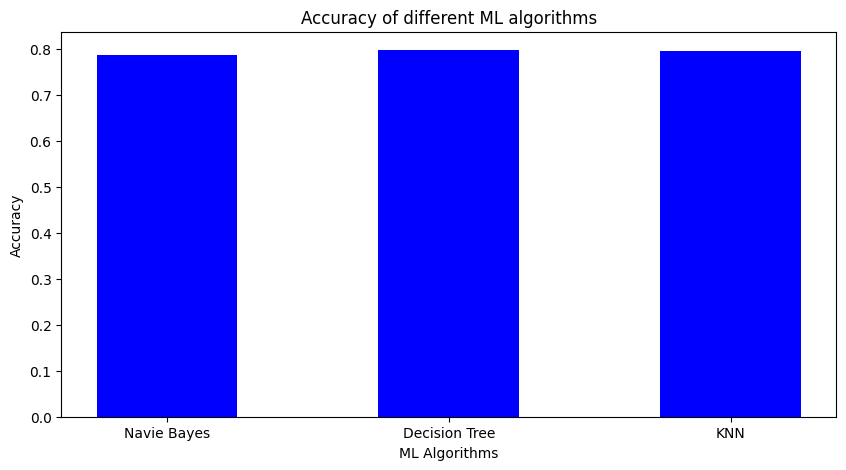

In [76]:
data = {"Navie Bayes":a, "Decision Tree":b,"KNN":c}
ML = list(data.keys())
Accuracy = list(data.values())

fig = plt.figure(figsize = (10,5))

plt.bar(ML, Accuracy, color = "blue", width = 0.5)

plt.xlabel("ML Algorithms")
plt.ylabel("Accuracy")
plt.title("Accuracy of different ML algorithms")
plt.show()